<a href="https://colab.research.google.com/github/Anees31-AI/MedicalCost/blob/main/Medical_insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Uploading data file to colab**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving insurance.csv to insurance.csv


**Upload Dataset**

In [ ]:
import pandas as pd
#Load Dataset
df=pd.read_csv('insurance.csv')
#Peek at the data
print(df.head())
#Data Summary
print(df.info())
print(df.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

**One-hot encoding for categorical variables**

In [ ]:
#One-hot encoded 'sex','smoker',and 'region'
df_encoded=pd.get_dummies(df,drop_first=True)

#Features and targets
X=df_encoded.drop('charges',axis=1)
y=df_encoded['charges']

**Trian_test_split and Scaling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Scale Features
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

**Function to simplify evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

#Results  dict to store mmodel metrics
results={}
#Evaluation function
def evaluate_model(name,model,X_test,y_test):
  y_pred=model.predict(X_test)
  mse=mean_squared_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)
  results[name]={"MSE":mse,"R2":r2}
  print(f"{name} - MSE:{mse:.2f},R²:{r2:.4f}")

**Basline -Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
#Train Model
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
#Predict
y_pred_lr=lr.predict(X_test_scaled)
#Evaluate
evaluate_model("Linear Regression",lr,X_test_scaled,y_test)

Linear Regression - MSE:33596915.85,R²:0.7836


**Ridge,Lasso ,Elastic Net**

In [ ]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

#Ridge
ridge=Ridge(alpha=1.0)
ridge.fit(X_train_scaled,y_train)
evaluate_model("Ridge Regression",ridge,X_test_scaled,y_test)
#Lasso
lasso=Lasso(alpha=1.0)
lasso.fit(X_train_scaled,y_train)
evaluate_model("Lasso",lasso,X_test_scaled,y_test)

#ElasticNet
enet=ElasticNet(alpha=0.1,l1_ratio=0.5)
enet.fit(X_train_scaled,y_train)
evaluate_model("ElasticNet",enet,X_test_scaled,y_test)

Ridge Regression - MSE:33604973.54,R²:0.7835
Lasso - MSE:33601146.02,R²:0.7836
ElasticNet - MSE:34267911.94,R²:0.7793


**Polynomial Regression (Degree 2)**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

poly_model=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
poly_model.fit(X_train_scaled,y_train)
evaluate_model("Polynomial Degree 2",poly_model,X_test_scaled,y_test)

Polynomial Degree 2 - MSE:20712805.99,R²:0.8666


**KNN Rgression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled,y_train)
evaluate_model("KNN",knn,X_test_scaled,y_test)

KNN - MSE:30459865.82,R²:0.8038


**Decision Tree and Random Forest**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Decision Tree
dt=DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled,y_train)
evaluate_model("Decision Tree",dt,X_test_scaled,y_test)

#Random Forest
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train_scaled,y_train)
evaluate_model("Random Forest",rf,X_test_scaled,y_test)

Decision Tree - MSE:40795333.45,R²:0.7372
Random Forest - MSE:20864569.51,R²:0.8656


**Support vector Regressor**

In [ ]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_train_scaled,y_train)
evaluate_model("SVR",svr,X_test_scaled,y_test)


SVR - MSE:166128803.81,R²:-0.0701


In [ ]:
!pip install xgboost lightgbm catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

#XGBoost
xgb_model=xgb.XGBRegressor(n_estimators=100)
xgb_model.fit(X_train_scaled,y_train)
evaluate_model("XGBoost",xgb_model,X_test_scaled,y_test)

#LightGBM
lgb_model=LGBMRegressor(n_estimators=100)
lgb_model.fit(X_train_scaled,y_train)
evaluate_model("LightGBM",lgb_model,X_test_scaled,y_test)

#CatBoost(Silent Mode)
cat_model=CatBoostRegressor(verbose=0)
cat_model.fit(X_train_scaled,y_train)
evaluate_model("CatBoost",cat_model,X_test_scaled,y_test)

XGBoost - MSE:23434704.62,R²:0.8491
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 8
[LightGBM] [Info] Start training from score 13346.089733
LightGBM - MSE:20815018.32,R²:0.8659


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


CatBoost - MSE:20002667.81,R²:0.8712


**Bayesian Ridge Regression**

In [ ]:
from sklearn.linear_model import BayesianRidge
bayes=BayesianRidge()
bayes.fit(X_train_scaled,y_train)
evaluate_model("Bayesian Ridge",bayes,X_test_scaled,y_test)

Bayesian Ridge - MSE:33619619.69,R²:0.7834


**Neural Network Regression**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn_model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(64,activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam',loss='mse',metrics=['mae'])
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
y_pred_nn = nn_model.predict(X_test_scaled).flatten()
evaluate_model("Neural Network", nn_model, X_test_scaled, y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Neural Network - MSE:32281221.92,R²:0.7921


**Compare All  models**

<ipython-input-16-9dd7f2780d91>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results.reset_index(), x="index", y="R2", palette="viridis")


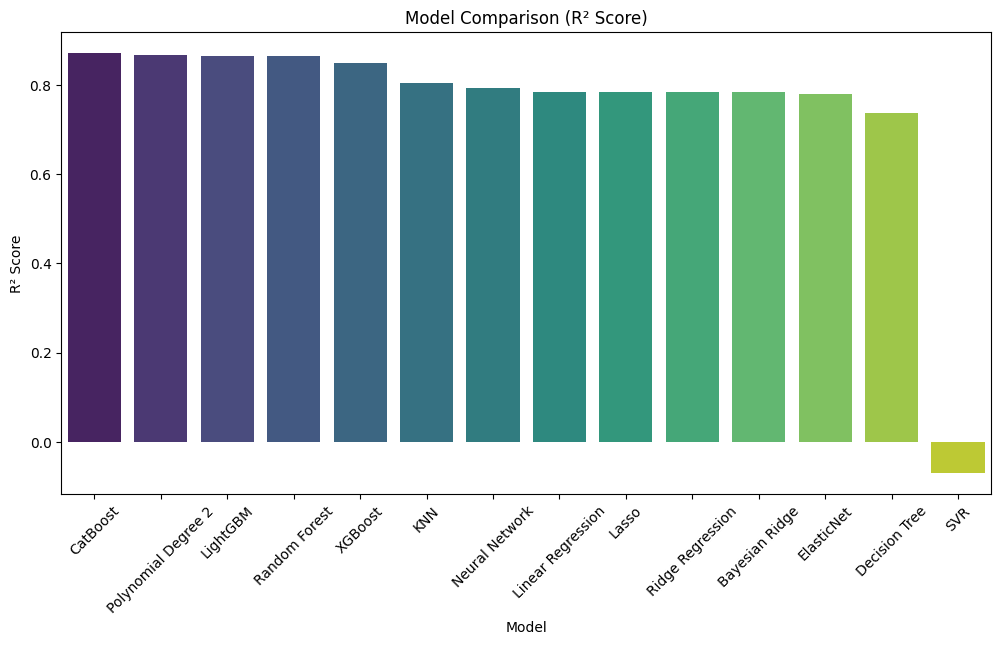

In [ ]:
import seaborn as sns

df_results = pd.DataFrame(results).T
df_results.sort_values("R2", ascending=False, inplace=True)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_results.reset_index(), x="index", y="R2", palette="viridis")
plt.xticks(rotation=45)
plt.title("Model Comparison (R² Score)")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.show()

**Converting the result into a dataframe**

In [ ]:
import pandas as pd
df_results=pd.DataFrame(results).T
df_results_sorted=df_results.sort_values("R2",ascending=False)
print(df_results_sorted)


                              MSE        R2
CatBoost             2.000267e+07  0.871157
Polynomial Degree 2  2.071281e+07  0.866583
LightGBM             2.081502e+07  0.865925
Random Forest        2.086457e+07  0.865606
XGBoost              2.343470e+07  0.849051
KNN                  3.045987e+07  0.803800
Neural Network       3.228122e+07  0.792068
Linear Regression    3.359692e+07  0.783593
Lasso                3.360115e+07  0.783566
Ridge Regression     3.360497e+07  0.783541
Bayesian Ridge       3.361962e+07  0.783447
ElasticNet           3.426791e+07  0.779271
Decision Tree        4.079533e+07  0.737226
SVR                  1.661288e+08 -0.070082


**Visulaizing all R2 scores**

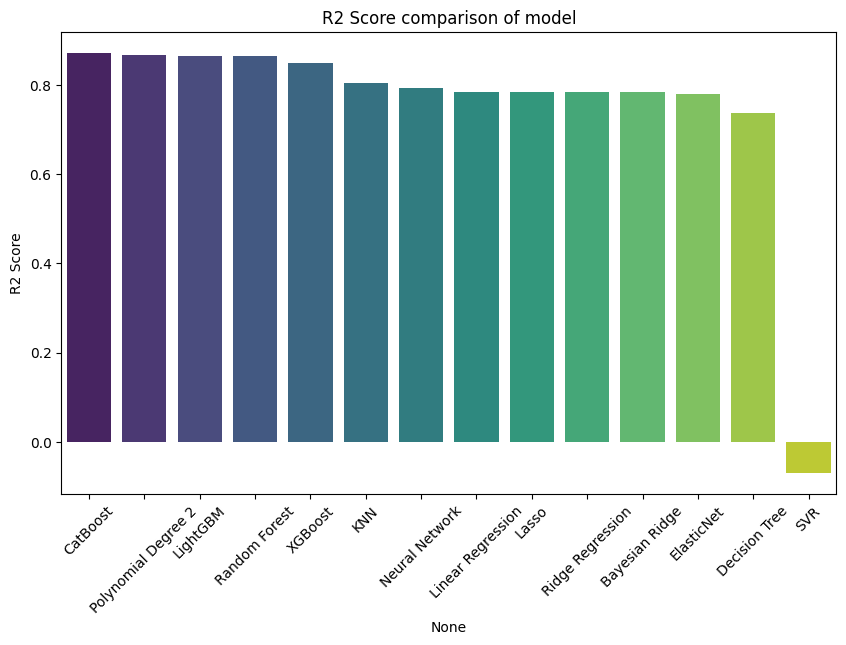

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x=df_results_sorted.index,y=df_results_sorted["R2"],hue=df_results_sorted.index,palette="viridis" ,legend=False)
plt.title("R2 Score comparison of model")
plt.ylabel("R2 Score")
plt.xticks(rotation=45)
plt.show()


In [ ]:
!pip install catboost

**Catboost Model**

In [ ]:
from catboost import CatBoostRegressor

cat_model=CatBoostRegressor(verbose=0,random_seed=42)
cat_model.fit(X_train_scaled,y_train)
#Evaluate it
evaluate_model("CatBoost",cat_model,X_test_scaled,y_test)

CatBoost - MSE:20763595.69,R²:0.8663


**Tuning Catboost**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'iterations':[200,500],
    'depth':[4,6,8],
    'learning_rate':[0.01,0.1],
    'l2_leaf_reg':[1,3,5]
}
cb_model=CatBoostRegressor(verbose=0,random_seed=42)
grid_search_cb=GridSearchCV(cb_model,param_grid,cv=3,scoring='r2',n_jobs=-1,verbose=1)
grid_search_cb.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7ace218b6350>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [200, 500],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.1]},
             scoring='r2', verbose=1)

**Evaluation**

In [ ]:
print("Best params",grid_search_cb.best_params_)
print("Best R² (CV)",grid_search_cb.best_score_)
#Evaluate on test set
best_cb=grid_search_cb.best_estimator_
evaluate_model("CatBoost Tuned",best_cb,X_test_scaled,y_test)

Best params {'depth': 4, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.01}
Best R² (CV) 0.8519228903818655
CatBoost Tuned - MSE:18342017.85,R²:0.8819


**Feature Importance**

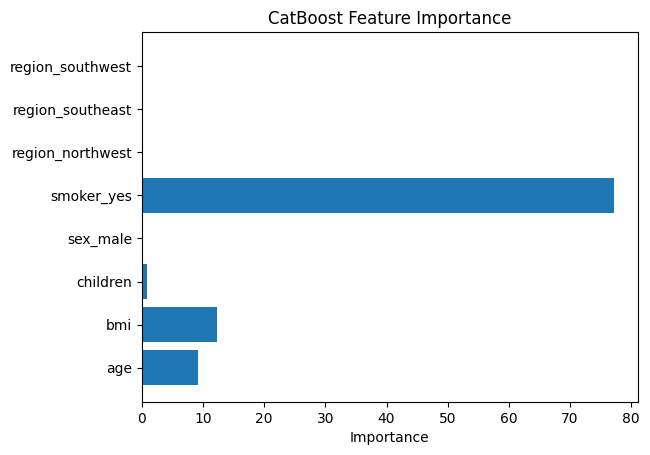

In [ ]:
import matplotlib.pyplot as plt

feature_importances=best_cb.get_feature_importance()
plt.barh(range(len(feature_importances)),feature_importances)
plt.yticks(range(len(feature_importances)),X.columns)
plt.xlabel("Importance")
plt.title("CatBoost Feature Importance")
plt.show()